**Ucitavanje slika sa google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
main_path_trainval = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set'
main_path_test = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Test_set'
img_size = (64, 64)
batch_size = 64


**Podela lika na Train Val Test skupove**

In [3]:
from keras.utils import image_dataset_from_directory
Xtrain = image_dataset_from_directory(main_path_trainval,
      subset='training',
      validation_split=0.2,
      image_size=img_size,
      batch_size=batch_size,
      shuffle = True,
      seed=123)
Xval = image_dataset_from_directory(main_path_trainval,
      subset='validation',
      validation_split=0.2,
      image_size=img_size,
      batch_size=batch_size,
      shuffle = True,
      seed=123)
Xtest = image_dataset_from_directory(main_path_test,     
      image_size=img_size,
      batch_size=batch_size)



Found 2500 files belonging to 5 classes.
Using 2000 files for training.
Found 2500 files belonging to 5 classes.
Using 500 files for validation.
Found 500 files belonging to 5 classes.


In [4]:
classes1 = Xtrain.class_names
print(classes1)
print(len(classes1))
classes2 = Xval.class_names
print(classes2)
print(len(classes2))
classes3 = Xtest.class_names
print(classes3)
print(len(classes3))

['V', 'W', 'X', 'Y', 'Z']
5
['V', 'W', 'X', 'Y', 'Z']
5
['V', 'W', 'X', 'Y', 'Z']
5


**Raspodela slika po klasama**

In [5]:
import os
X = [ 'V', 'W', 'X', 'Y', 'Z'];
for i in X:
    myPath = os.path.abspath('./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/'+i)
    num = 0
    items = os.listdir(myPath)
    for item in items:
        if os.path.isfile(os.path.join(myPath, item)):
            num = num + 1  
    print(f'Broj slika za clasu: {i} je:  {num}')   

Broj slika za clasu: V je:  500
Broj slika za clasu: W je:  500
Broj slika za clasu: X je:  500
Broj slika za clasu: Y je:  500
Broj slika za clasu: Z je:  500


**Primer slike iz svake klase**

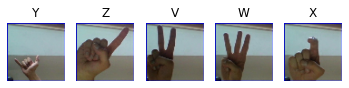

In [28]:
N = 5
plt.figure()
for img, lab in Xtrain.take(1):
  for i in range(N):
      plt.subplot(1, N, i+1)
      plt.imshow(img[i].numpy().astype('uint8'))
      plt.title(classes1[lab[i]])
      plt.axis('off')


**Transformacije slike**

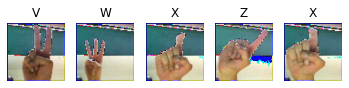

In [ ]:
data = Xtrain.map(lambda x,y: (x*2, y))
#data = Xtrain.map(lambda x,y: ((x - min(x))/(max(x) - min(x)), y))

N = 5
plt.figure()
for img, lab in data.take(1):
  for i in range(N):
      plt.subplot(1, N, i+1)
      plt.imshow(img[i].numpy().astype('uint8'))
      plt.title(classes1[lab[i]])
      plt.axis('off')




**Augmentacija**

In [30]:
from keras import layers
from keras import Sequential
data_augmentation = Sequential(
 [
 layers.RandomFlip("horizontal", input_shape=(img_size[0], img_size[1], 3)),
 layers.RandomRotation(0.25),
 layers.RandomZoom(0.1),
 ]
)

**Efekat augmentacije**

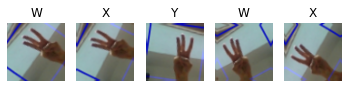

In [32]:
N = 5
plt.figure()
for img, lab in Xtrain.take(1):
    plt.title(classes1[lab[0]])
    for i in range(N):
        aug_img = data_augmentation(img)
        plt.subplot(1, N, i+1)
        plt.imshow(aug_img[0].numpy().astype('uint8'))
        plt.title(classes1[lab[i]])
        plt.axis('off')

In [34]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Nasa Mreza**

In [ ]:
from keras.regularizers import l2
from keras import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy 
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
num_classes = len(classes1)


def make_model(drop = 0.2, llr = 0.001, ll2 = 0.01):
    model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(64, 64, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=l2(ll2)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(ll2)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Dropout(drop),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
    ])
    model.summary()
    model.compile(Adam(learning_rate=llr),
              loss=SparseCategoricalCrossentropy(),
              metrics='accuracy')
    return model




In [ ]:
pip install scikeras

**Ucenje sa 60 epoha**

In [ ]:
model1 = make_model(0.25)
history1 = model1.fit(Xtrain,
 epochs=60,
 validation_data=Xval,
 verbose=0)

Model: "sequential_162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 rescaling_163 (Rescaling)   (None, 64, 64, 3)         0         
                                                                 
 conv2d_800 (Conv2D)         (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_480 (MaxPooli  (None, 32, 32, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_801 (Conv2D)         (None, 32, 32, 32)        4640      
                                                                 
 conv2d_802 (Conv2D)         (None, 32, 32, 32)        9248      
                                                    

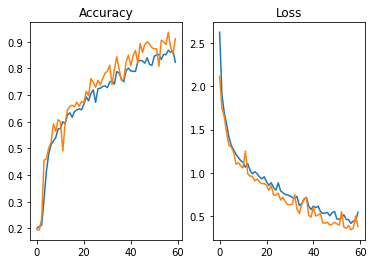

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.figure()
plt.subplot(121)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.subplot(122)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.show()

In [ ]:
labels = np.array([])
pred = np.array([])
for img, lab in Xtest:
    labels = np.append(labels, lab)
    pred = np.append(pred, np.argmax(model1.predict(img, verbose=0), axis=1)) 

Tačnost modela na test skupu je: 55.60000000000001%


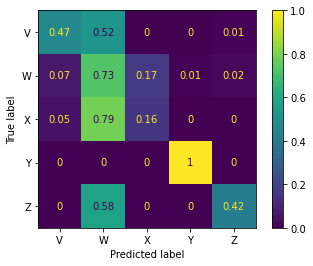

In [ ]:
from sklearn.metrics import accuracy_score
print('Tačnost modela na test skupu je: ' + str(100*accuracy_score(labels, pred)) + '%')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels, pred, normalize='true')
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes1)
cmDisplay.plot()
plt.show()

**Ucenje sa 100 epoha drop = 0.1, lr = 0.001, l2 = 0.01**

In [ ]:
model2 = make_model(0.1, 0.001, 0.01)
history2 = model2.fit(Xtrain,
 epochs=100,
 validation_data=Xval,
 verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                      

13/32 [===========>..................] - ETA: 1:49 - loss: 2.9852 - accuracy: 0.1815

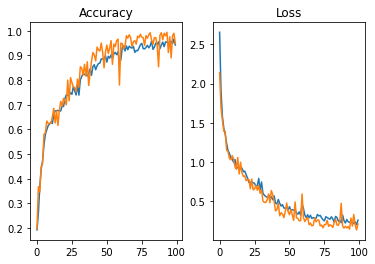

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.figure()
plt.subplot(121)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.subplot(122)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.show()

In [ ]:
labels = np.array([])
pred = np.array([])
for img, lab in Xtest:
    labels = np.append(labels, lab)
    pred = np.append(pred, np.argmax(model2.predict(img, verbose=0), axis=1)) 

Tačnost modela na test skupu je: 62.2%


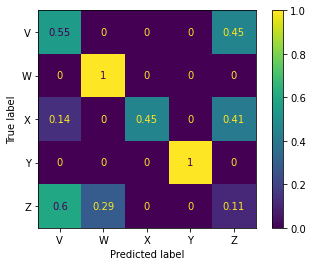

In [ ]:
from sklearn.metrics import accuracy_score
print('Tačnost modela na test skupu je: ' + str(100*accuracy_score(labels, pred)) + '%')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels, pred, normalize='true')
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes1)
cmDisplay.plot()
plt.show()

**Ucenje sa 100 epoha lr = 0.0001, dropout = 0.2**

In [ ]:
model3 = make_model(0.1, 0.0001, 0.01)
history3 = model3.fit(Xtrain,
 epochs=100,
 validation_data=Xval,
 verbose=1)

Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 rescaling_170 (Rescaling)   (None, 64, 64, 3)         0         
                                                                 
 conv2d_835 (Conv2D)         (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_501 (MaxPooli  (None, 32, 32, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_836 (Conv2D)         (None, 32, 32, 32)        4640      
                                                                 
 conv2d_837 (Conv2D)         (None, 32, 32, 32)        9248      
                                                    

32/32 [==============================] - 28s 697ms/step - loss: 3.1869 - accuracy: 0.2000 - val_loss: 3.1021 - val_accuracy: 0.1940
Epoch 2/100
32/32 [==============================] - 26s 793ms/step - loss: 3.0301 - accuracy: 0.2505 - val_loss: 2.9530 - val_accuracy: 0.1940
Epoch 3/100
32/32 [==============================] - 27s 833ms/step - loss: 2.8854 - accuracy: 0.2485 - val_loss: 2.8140 - val_accuracy: 0.2700
Epoch 4/100
32/32 [==============================] - 24s 724ms/step - loss: 2.7389 - accuracy: 0.3135 - val_loss: 2.6662 - val_accuracy: 0.3000
Epoch 5/100
32/32 [==============================] - 24s 721ms/step - loss: 2.5681 - accuracy: 0.3645 - val_loss: 2.5351 - val_accuracy: 0.3000
Epoch 6/100
32/32 [==============================] - 24s 722ms/step - loss: 2.4218 - accuracy: 0.3780 - val_loss: 2.4376 - val_accuracy: 0.2980
Epoch 7/100
32/32 [==============================] - 24s 730ms/step - loss: 2.3084 - accuracy: 0.4065 - val_loss: 2.3345 - val_accuracy: 0.3420
Epoc

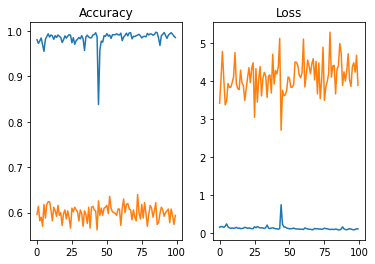

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
plt.figure()
plt.subplot(121)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.subplot(122)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.show()

In [ ]:
labels = np.array([])
pred = np.array([])
for img, lab in Xtest:
    labels = np.append(labels, lab)
    pred = np.append(pred, np.argmax(model3.predict(img, verbose=0), axis=1)) 

Tačnost modela na test skupu je: 20.599999999999998%


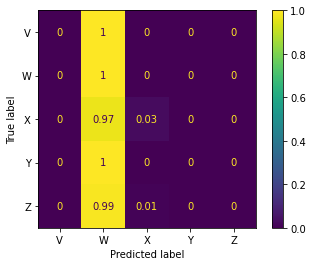

In [ ]:
from sklearn.metrics import accuracy_score
print('Tačnost modela na test skupu je: ' + str(100*accuracy_score(labels, pred)) + '%')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels, pred, normalize='true')
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes1)
cmDisplay.plot()
plt.show()